In [160]:
import requests
from bs4 import BeautifulSoup
import re

In [170]:
scrape_date = ['{}-{}-{}'.format(i, "%02d" % j, "%02d" % k) for i in range(2019,2020) for j in range(1,13) for k in range(1, 16, 14) ]

In [179]:

url='https://www.transfermarkt.us/premier-league/marktwerteverein/wettbewerb/GB1/plus/?stichtag='
#url = 'https://www.transfermarkt.us/premier-league/marktwerteverein/wettbewerb/GB1/stichtag/2019-08-15/plus/sort/marktwert_gesamt_stichtag.desc'

In [162]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'}
def get_page(url):
    responce = requests.get(url,headers=headers)
    soup = BeautifulSoup(responce.text,'lxml')
    return soup

In [226]:
team_info = []
value_info =[]
import time
for i in range(len(scrape_date)):
    time.sleep(1)
    print("scraping {} page".format(i))
    soup = get_page(url+scrape_date[i])
    team = soup.find_all('td', class_='hauptlink no-border-links')
    team_name = [team[i].text for i in range(len(team))]
    price_value = []
    for j in team_name:
        price = soup.find_all('a', attrs = {"title" : j, "id" : re.compile(r"^\d{1,}$")})
        temp = price[0].text
        if 'bn' in temp:
            temp = temp.strip('$, bn')
            temp = float(temp)*1000
        elif 'm' in temp:
            temp = temp.strip('$, m')
            temp = float(temp)
        else: temp = 0
        price_value.append(temp)
    team_info.append(team_name)
    value_info.append(price_value)

scraping 0 page
scraping 1 page
scraping 2 page
scraping 3 page
scraping 4 page
scraping 5 page
scraping 6 page
scraping 7 page
scraping 8 page
scraping 9 page
scraping 10 page
scraping 11 page
scraping 12 page
scraping 13 page
scraping 14 page
scraping 15 page
scraping 16 page
scraping 17 page
scraping 18 page
scraping 19 page
scraping 20 page
scraping 21 page
scraping 22 page
scraping 23 page


In [227]:
data1 = {team_name[j] : [value_info[i][j] for i in range(len(value_info))] for j in range(len(team_name))}

In [228]:
dff = pd.DataFrame(data1)
dff = dff.T
dff.columns = [scrape_date[i] for i in range(len(scrape_date))]

In [229]:
dff

,2019-01-01,2019-01-15,2019-02-01,2019-02-15,2019-03-01,2019-03-15,2019-04-01,2019-04-15,2019-05-01,2019-05-15,...,2019-08-01,2019-08-15,2019-09-01,2019-09-15,2019-10-01,2019-10-15,2019-11-01,2019-11-15,2019-12-01,2019-12-15
Manchester City,1290.00,1280.00,1280.00,1280.00,1280.00,1300.00,1300.00,1300.00,1300.00,1300.00,...,1410.00,1440.00,1440.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1480.00
Liverpool FC,1080.00,1060.00,1060.00,1060.00,1060.00,1080.00,1080.00,1080.00,1080.00,1080.00,...,1230.00,1220.00,1210.00,1220.00,1230.00,1230.00,1230.00,1220.00,1220.00,1340.00
Tottenham Hotspur,942.21,942.21,913.71,913.71,913.71,952.47,952.47,952.47,952.47,952.47,...,1030.00,1120.00,1120.00,1120.00,1120.00,1120.00,1120.00,1120.00,1120.00,1090.00
Chelsea FC,1030.00,1010.00,982.40,982.40,1010.00,1010.00,1010.00,1010.00,1010.00,1010.00,...,984.68,955.04,906.02,919.98,919.98,919.98,919.98,919.98,919.98,960.74
Manchester United,882.36,883.50,882.36,865.26,865.26,907.44,907.44,907.44,907.44,907.44,...,913.25,891.77,829.07,858.71,858.71,858.71,858.71,858.71,858.71,853.01
Arsenal FC,689.13,689.13,701.67,701.67,701.67,713.07,713.07,713.07,713.07,713.07,...,696.26,769.22,750.98,779.48,779.48,787.46,787.46,787.46,787.46,772.64
Leicester City,395.01,383.04,381.90,381.90,381.90,392.73,392.73,395.58,395.58,395.58,...,500.46,470.54,447.17,467.69,467.69,467.69,467.69,467.69,467.69,576.27
Everton FC,499.89,496.47,485.64,485.64,484.50,478.80,478.80,478.80,478.80,478.80,...,501.60,597.36,591.66,576.84,576.84,576.84,576.84,576.84,576.84,565.10
AFC Bournemouth,237.12,263.91,267.33,267.33,267.33,296.97,296.97,296.97,296.97,296.97,...,340.86,364.80,364.80,381.05,381.05,381.05,381.05,381.05,381.05,390.17
West Ham United,346.56,346.56,338.58,338.58,338.58,368.22,368.22,368.22,368.22,368.22,...,393.02,392.45,392.45,397.58,397.58,397.58,397.58,397.58,397.58,382.19


In [230]:
import matplotlib.pyplot as plt

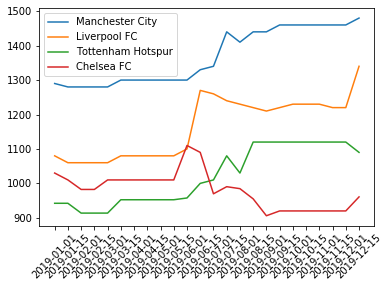

In [249]:
plt.plot(dff.columns, dff.loc['Manchester City'])
plt.plot(dff.columns, dff.loc['Liverpool FC'])
plt.plot(dff.columns, dff.loc['Tottenham Hotspur'])
plt.plot(dff.columns, dff.loc['Chelsea FC'])
plt.xticks(rotation=45)
plt.legend(a)

In [204]:
data = {team_name[j] : [value_info[i][j] for i in range(len(value_info))] for j in range(len(team_name))}

In [205]:
import pandas as pd
df = pd.DataFrame(data)

In [208]:
df = df.T

In [216]:
df.columns = [scrape_date[i] for i in range(len(scrape_date))]

In [217]:
df

,2019-01-01,2019-01-15,2019-02-01,2019-02-15,2019-03-01,2019-03-15,2019-04-01,2019-04-15,2019-05-01,2019-05-15,...,2019-08-01,2019-08-15,2019-09-01,2019-09-15,2019-10-01,2019-10-15,2019-11-01,2019-11-15,2019-12-01,2019-12-15
Manchester City,$1.29bn,$1.28bn,$1.28bn,$1.28bn,$1.28bn,$1.30bn,$1.30bn,$1.30bn,$1.30bn,$1.30bn,...,$1.41bn,$1.44bn,$1.44bn,$1.46bn,$1.46bn,$1.46bn,$1.46bn,$1.46bn,$1.46bn,$1.48bn
Liverpool FC,$1.08bn,$1.06bn,$1.06bn,$1.06bn,$1.06bn,$1.08bn,$1.08bn,$1.08bn,$1.08bn,$1.08bn,...,$1.23bn,$1.22bn,$1.21bn,$1.22bn,$1.23bn,$1.23bn,$1.23bn,$1.22bn,$1.22bn,$1.34bn
Tottenham Hotspur,$942.21m,$942.21m,$913.71m,$913.71m,$913.71m,$952.47m,$952.47m,$952.47m,$952.47m,$952.47m,...,$1.03bn,$1.12bn,$1.12bn,$1.12bn,$1.12bn,$1.12bn,$1.12bn,$1.12bn,$1.12bn,$1.09bn
Chelsea FC,$1.03bn,$1.01bn,$982.40m,$982.40m,$1.01bn,$1.01bn,$1.01bn,$1.01bn,$1.01bn,$1.01bn,...,$984.68m,$955.04m,$906.02m,$919.98m,$919.98m,$919.98m,$919.98m,$919.98m,$919.98m,$960.74m
Manchester United,$882.36m,$883.50m,$882.36m,$865.26m,$865.26m,$907.44m,$907.44m,$907.44m,$907.44m,$907.44m,...,$913.25m,$891.77m,$829.07m,$858.71m,$858.71m,$858.71m,$858.71m,$858.71m,$858.71m,$853.01m
Arsenal FC,$689.13m,$689.13m,$701.67m,$701.67m,$701.67m,$713.07m,$713.07m,$713.07m,$713.07m,$713.07m,...,$696.26m,$769.22m,$750.98m,$779.48m,$779.48m,$787.46m,$787.46m,$787.46m,$787.46m,$772.64m
Leicester City,$395.01m,$383.04m,$381.90m,$381.90m,$381.90m,$392.73m,$392.73m,$395.58m,$395.58m,$395.58m,...,$500.46m,$470.54m,$447.17m,$467.69m,$467.69m,$467.69m,$467.69m,$467.69m,$467.69m,$576.27m
Everton FC,$499.89m,$496.47m,$485.64m,$485.64m,$484.50m,$478.80m,$478.80m,$478.80m,$478.80m,$478.80m,...,$501.60m,$597.36m,$591.66m,$576.84m,$576.84m,$576.84m,$576.84m,$576.84m,$576.84m,$565.10m
AFC Bournemouth,$237.12m,$263.91m,$267.33m,$267.33m,$267.33m,$296.97m,$296.97m,$296.97m,$296.97m,$296.97m,...,$340.86m,$364.80m,$364.80m,$381.05m,$381.05m,$381.05m,$381.05m,$381.05m,$381.05m,$390.17m
West Ham United,$346.56m,$346.56m,$338.58m,$338.58m,$338.58m,$368.22m,$368.22m,$368.22m,$368.22m,$368.22m,...,$393.02m,$392.45m,$392.45m,$397.58m,$397.58m,$397.58m,$397.58m,$397.58m,$397.58m,$382.19m
